<a href="https://colab.research.google.com/github/Ayushmanmahalgamaiya/Apna-Guide/blob/main/churn_prediction_telco_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries we'll need

import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn-Data.csv')
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [3]:
df.dtypes

cID                  object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
TV_Streaming         object
Movie_Streaming      object
Contract             object
PaperlessBilling     object
Method_Payment       object
Charges_Month       float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
for item in df.columns:
    print(item)
    print (df[item].unique())

cID
['4223-BKEOR' '6035-RIIOM' '3797-VTIDR' ... '8044-BGWPI' '7450-NWRTR'
 '4795-UXVCJ']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['No' 'Yes']
Dependents
['Yes' 'No']
tenure
[21 54  1  4  0  7 32 72 19 10 45 40 47 36 69 71 35  3 68 42  8 46 12 26
 49 33 31 66 58 13 57  6 59 15 27 34 18  5 39 29  2 63 20 14 56 37 24 52
 43 11 16 50 38 23 55 48 53 70 22 28 44 65 64 60 51  9 25 61 30 17 41 67
 62]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['Yes' 'No' 'No internet service']
OnlineBackup
['No' 'Yes' 'No internet service']
DeviceProtection
['Yes' 'No' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
TV_Streaming
['No' 'Yes' 'No internet service']
Movie_Streaming
['Yes' 'No' 'No internet service']
Contract
['One year' 'Two year' 'Month-to-month']
PaperlessBilling
['No' 'Yes']
Method_Payment
['Mailed check' 'Bank transfer (automatic)' 'Electronic check'
 'Credit card (automa

In [5]:
for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")
df.head()

SeniorCitizen couldn't convert
tenure couldn't convert
Charges_Month couldn't convert


,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,...,yes,no,no,yes,one year,no,mailed check,64.85,1336.8,no
1,6035-riiom,female,0,no,no,54,yes,yes,fiber optic,no,...,no,no,yes,yes,two year,yes,bank transfer (automatic),97.20,5129.45,no
2,3797-vtidr,male,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,23.45,23.45,yes
3,2568-brgyx,male,0,no,no,4,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.20,237.95,yes
4,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,...,no,yes,no,no,two year,yes,bank transfer (automatic),61.90,,no


In [6]:
columns_to_convert = ['Partner',
                      'Dependents',
                      'PhoneService',
                      'PaperlessBilling',
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-bkeor,female,0,0,1,21,1,no,dsl,yes,...,yes,no,no,yes,one year,0,mailed check,64.85,1336.8,0
1,6035-riiom,female,0,0,0,54,1,yes,fiber optic,no,...,no,no,yes,yes,two year,1,bank transfer (automatic),97.20,5129.45,0
2,3797-vtidr,male,0,1,0,1,0,no phone service,dsl,no,...,no,no,no,no,month-to-month,1,electronic check,23.45,23.45,1
3,2568-brgyx,male,0,0,0,4,1,no,fiber optic,no,...,no,no,no,no,month-to-month,1,electronic check,70.20,237.95,1
4,2775-sefee,male,0,0,1,0,1,yes,dsl,yes,...,no,yes,no,no,two year,1,bank transfer (automatic),61.90,,0


In [7]:
df.dtypes

cID                  object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
TV_Streaming         object
Movie_Streaming      object
Contract             object
PaperlessBilling      int64
Method_Payment       object
Charges_Month       float64
TotalCharges         object
Churn                 int64
dtype: object

In [8]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
df.isnull().sum(axis = 0)

cID                  0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
TV_Streaming         0
Movie_Streaming      0
Contract             0
PaperlessBilling     0
Method_Payment       0
Charges_Month        0
TotalCharges        10
Churn                0
dtype: int64

In [10]:
df = df.fillna(value=0)

In [11]:
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df2 = pd.concat([churners, non_churners],ignore_index=True)

Number of churners 1496
Number of non-churners 1496


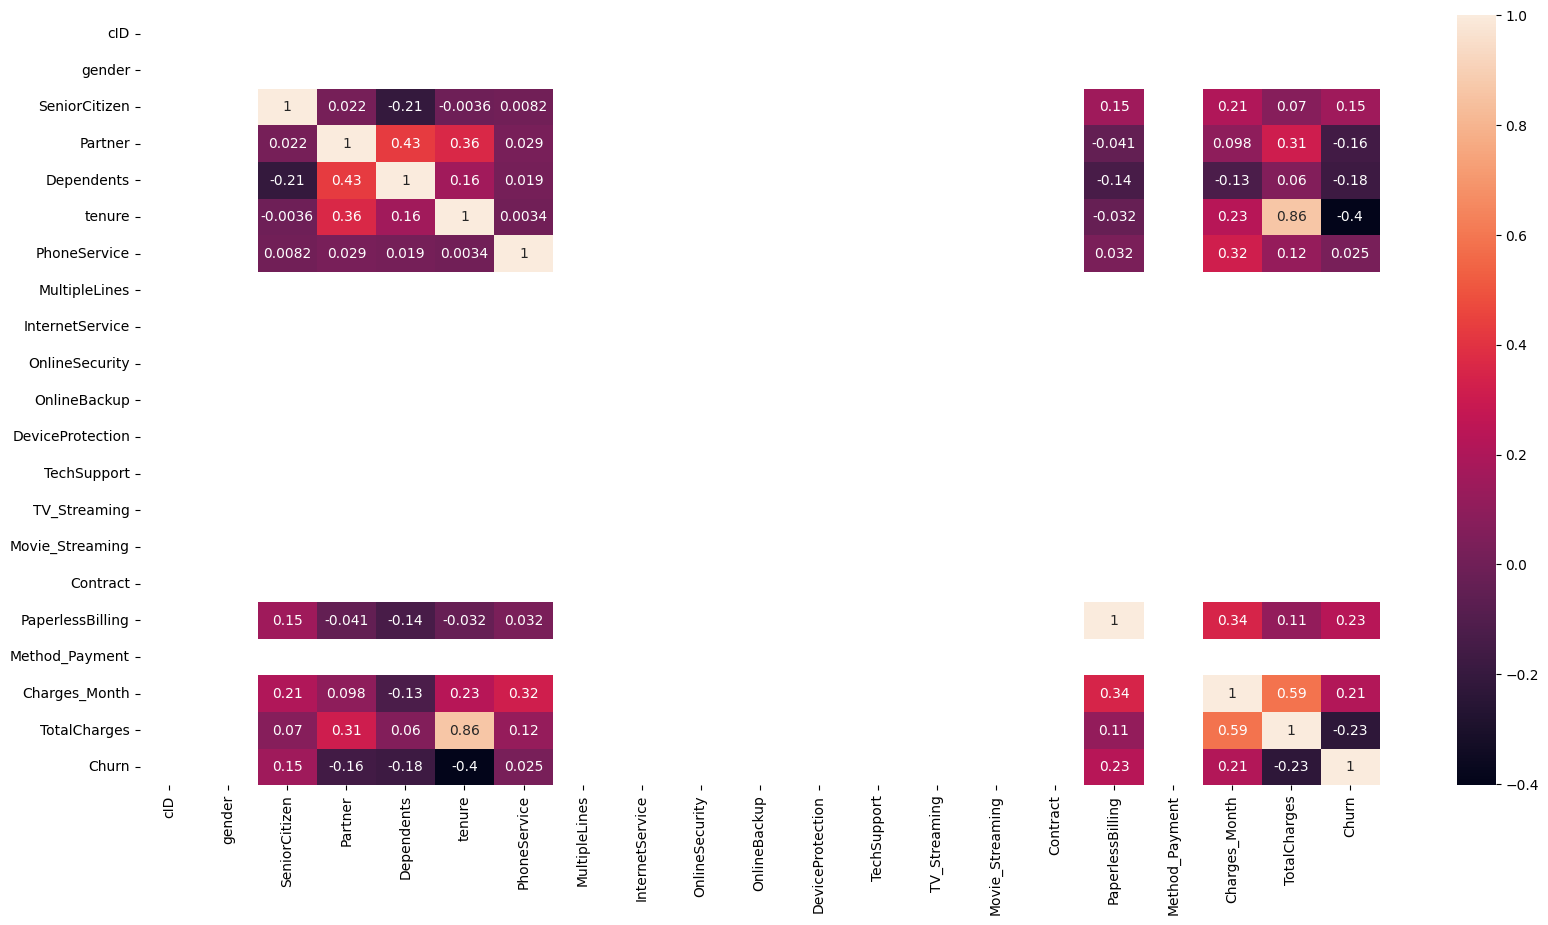

In [12]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))

    # Handle mixed data types and missing values
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
            try:
                dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce') # Convert non-numeric to NaN
            except ValueError:
                print(f"Could not convert column '{col}' to numeric.")
        # Fill missing values with a suitable strategy (e.g., mean)
        if dataframe[col].isnull().any():
            dataframe[col] = dataframe[col].fillna(dataframe[col].mean())

    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr,
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df2,show_chart=True)

In [13]:
try:
    customer_id = df2['customerID'] # Store this as customer_id variable
    del df2['customerID'] # Don't need in ML DF
except:
    print("already removed customerID")

already removed customerID


In [14]:
df2.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,NaN,NaN,0,1,0,1,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,23.45,23.45,1
1,NaN,NaN,0,0,0,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,70.20,237.95,1
2,NaN,NaN,0,0,0,19,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,39.65,733.35,1
3,NaN,NaN,1,1,0,21,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,69.10,1474.75,1
4,NaN,NaN,1,0,0,8,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,92.10,729.95,1


In [15]:
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,0.0,0.0,0,1,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,23.45,23.45,1
1,0.0,0.0,0,0,0,4,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,70.20,237.95,1
2,0.0,0.0,0,0,0,19,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,39.65,733.35,1
3,0.0,0.0,1,1,0,21,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,69.10,1474.75,1
4,0.0,0.0,1,0,0,8,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0.0,92.10,729.95,1


In [16]:
# Add a random column to the dataframe
ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

In [17]:
show_correlations(ml_dummies, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                 1.000000
PaperlessBilling      0.229929
Charges_Month         0.211751
SeniorCitizen         0.151291
PhoneService          0.025481
---randomColumn---    0.003128
Partner              -0.160693
Dependents           -0.177057
TotalCharges         -0.230483
tenure               -0.402132
cID                        NaN
gender                     NaN
MultipleLines              NaN
InternetService            NaN
OnlineSecurity             NaN
OnlineBackup               NaN
DeviceProtection           NaN
TechSupport                NaN
TV_Streaming               NaN
Movie_Streaming            NaN
Contract                   NaN
Method_Payment             NaN
Name: Churn, dtype: float64

<Figure size 2000x1000 with 0 Axes>

In [18]:
try:
    label = ml_dummies['Churn'] # Remove the label before training the model
    del ml_dummies['Churn']
except:
    print("label already removed.")

KNeighborsClassifier
0.668 
 - - - - -  

DecisionTreeClassifier
0.734 
 - - - - -  



<AxesSubplot:ylabel='features'>

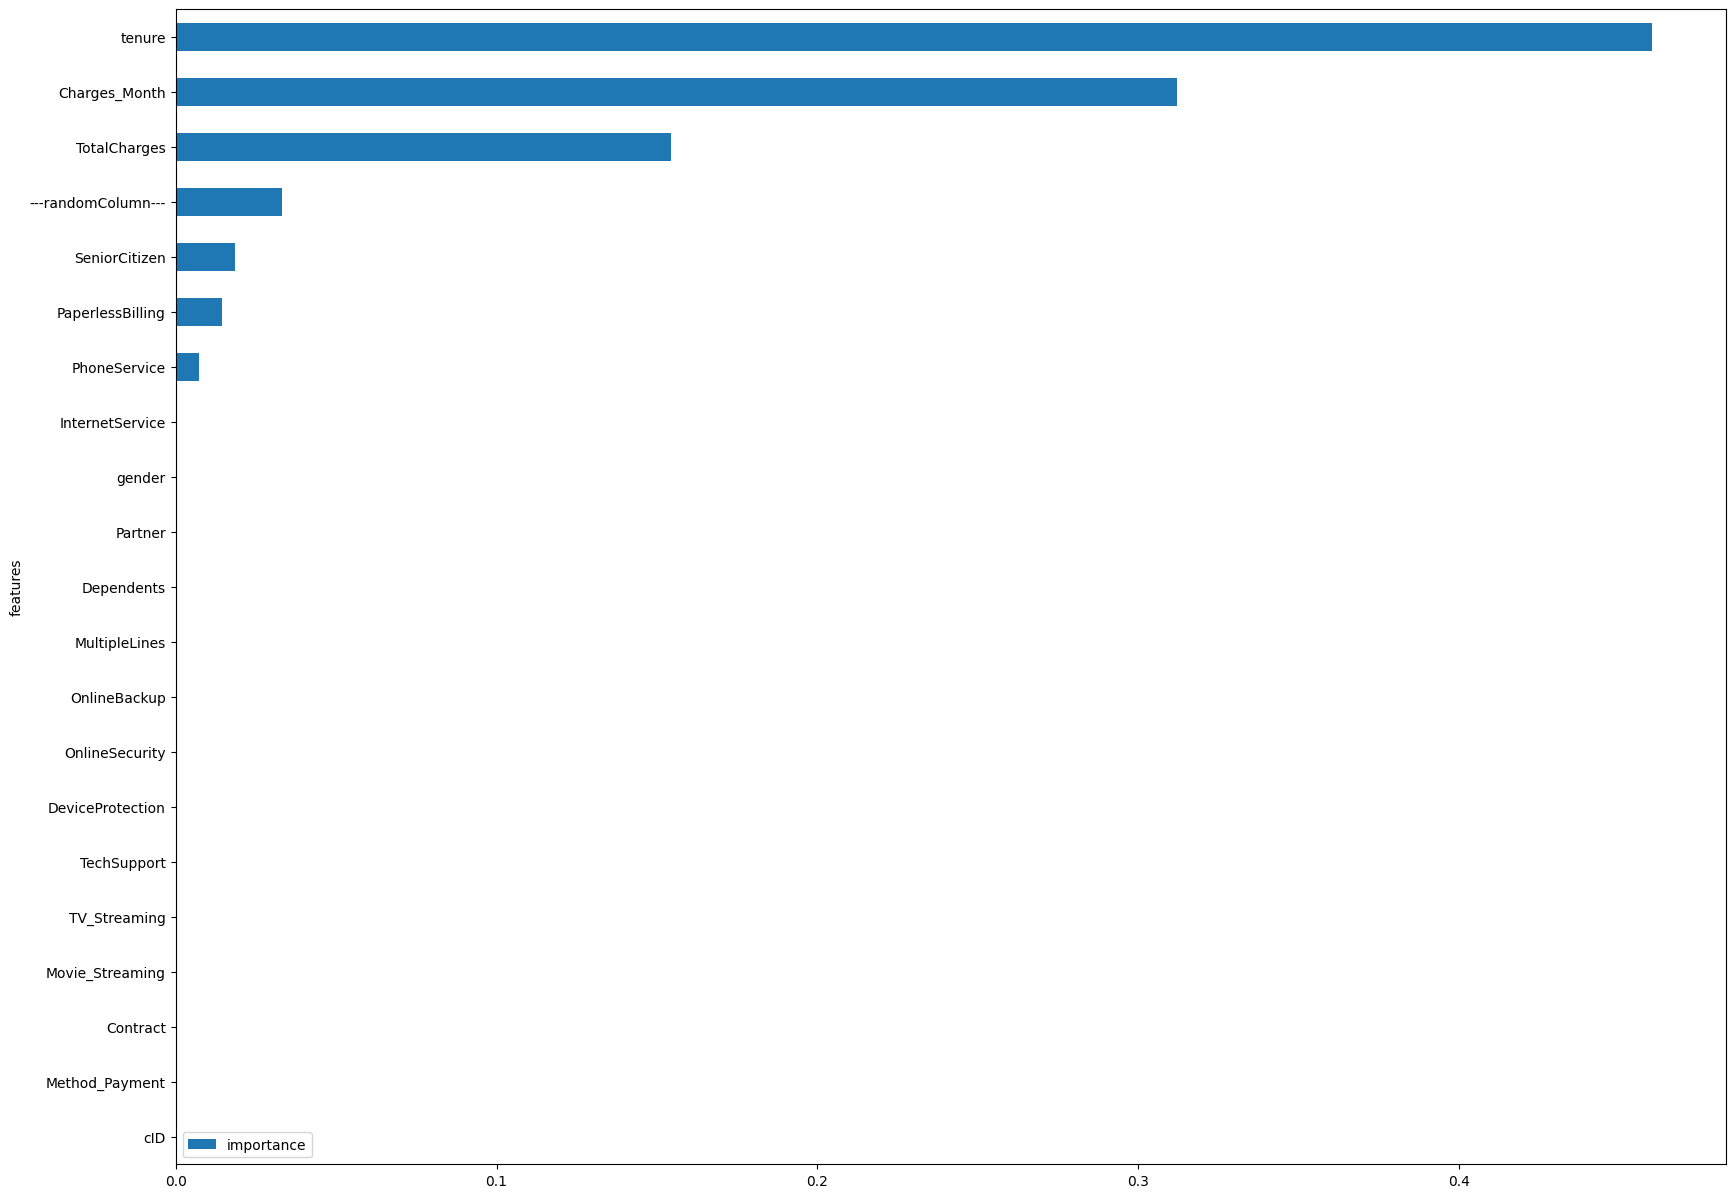

In [19]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),
    DecisionTreeClassifier(max_depth=5)
]


# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)

    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")

feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

Confusion matrix, without normalization
[[328 137]
 [102 331]]
Normalized confusion matrix
[[0.71 0.29]
 [0.24 0.76]]


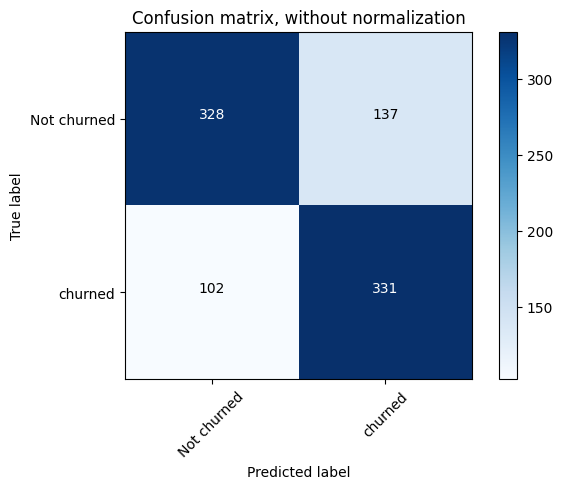

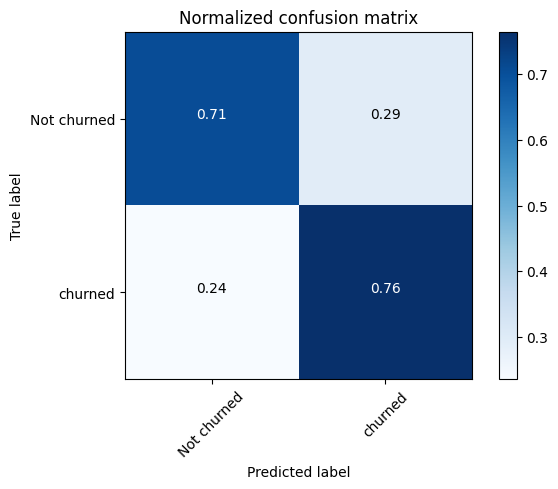

              precision    recall  f1-score   support

 Not churned       0.76      0.71      0.73       465
     churned       0.71      0.76      0.73       433

    accuracy                           0.73       898
   macro avg       0.74      0.73      0.73       898
weighted avg       0.74      0.73      0.73       898



In [20]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)


In [21]:
from sklearn.model_selection import GridSearchCV

max_depth_range = range(2,20,2)
leaf_range = range(1,10,2)
n_estimators_range = range(10,200,10)
max_features_range = range(1,len(ml_dummies.columns),5)


param_grid = dict(max_depth = max_depth_range,
                 min_samples_leaf = leaf_range,
                 n_estimators = n_estimators_range,
                 max_features = max_features_range
                )

### Warning, can take some time

# d_tree = RandomForestClassifier()
# grid = GridSearchCV(d_tree, param_grid, cv=5, scoring = 'accuracy', verbose=1, return_train_score=True)
# grid.fit(feature_train, label_train)
# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)

In [22]:
# Preprocessing original dataframe
def preprocess_df(dataframe , training=True):
    x = dataframe.copy() # Assign x here
    customer_id = None
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
    except:
        print("already removed customerID")

    ml_dummies = pd.get_dummies(x) # Now x is defined
    ml_dummies.fillna(value=0, inplace=True)




        # import random done above
    ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))


    if training:
      pass

    else:
        # Add missing columns with 0s in prediction data
        for col in feature_train.columns: # Assuming feature_train is available from training
            if col not in ml_dummies.columns:
                ml_dummies[col] = 0

    try:
        label = ml_dummies['Churn']
        del ml_dummies['Churn']
    except:
        print("label already removed.")


    return ml_dummies, customer_id, label


original_df = preprocess_df(df,training=False)





already removed customerID


In [23]:
output_df = original_df[0].copy()
output_df['---randomColumn---']
output_df = output_df[feature_train.columns]
output_df_numeric = output_df.select_dtypes(include=['number'])  # Select only numeric columns
output_df['prediction'] = clf.predict_proba(output_df_numeric)[:,1]
output_df['churn'] = original_df[2]
output_df['customerID'] = original_df[1]

In [24]:
print('Mean predict proba of churn:',round(output_df[output_df['churn'] == 1]['prediction'].mean(),2))
print('Mean predict proba of NON-churn:',round(output_df[output_df['churn'] == 0]['prediction'].mean(),2))

Mean predict proba of churn: 0.66
Mean predict proba of NON-churn: 0.35


In [25]:
activate = output_df[output_df['churn'] == 0]
activate[['customerID','churn','prediction']]

,customerID,churn,prediction
0,None,0,0.320930
1,None,0,0.547085
4,None,0,0.849057
5,None,0,0.217391
6,None,0,0.041176
...,...,...,...
5626,None,0,0.849057
5627,None,0,0.021277
5630,None,0,0.743590
5631,None,0,0.294118
